2차원 Poisson equation은 다음과 같이 주어진다.

∇ଶuሺx, yሻ ൌ fሺx, yሻ for ሺx, yሻ ∈ Ω

그리고 경계 ∂Ω ൌ ∂Ωୈ ∪ ∂Ωே 는 다음과 같이 주어진다.

uሺx, yሻ ൌ gሺx, yሻ on ∂Ω஽ and ∂u/∂n ൌ hሺx, yሻ on ∂Ωே
n은 경계에 대한 수직방향이며, ∂Ω஽는 Dirichlet 경계를, ∂Ωே는 Neumann 경계를 의미한다.

1. (Iterative Poisson solver) 정사각 계산영역 ሾ0,1ሿ ൈ ሾ0,1ሿ이 주어졌고, 경계에서의 u=0이며, fሺx, yሻ ൌsinሺπxሻ sinሺπyሻ로 주어졌을 때, 포아송 방정식을 계산하시오.

(1) 반복계산을 사용하여 Poisson equation 을 균일 격자계에서 주변 5개 격자점을 사용하여 계산하시오.
1) Jacobi method, 2) Gauss‐Seidel method, 3) Gauss‐Seidel method with successive over‐relaxation (SOR)

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import time

n=41

x_list=np.linspace(0, 1, n)
y_list=np.linspace(0, 1, n)
X,Y=np.meshgrid(x_list, y_list)
h=x_list[1]-x_list[0]

u0=np.zeros((n, n))

def f(x, y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)

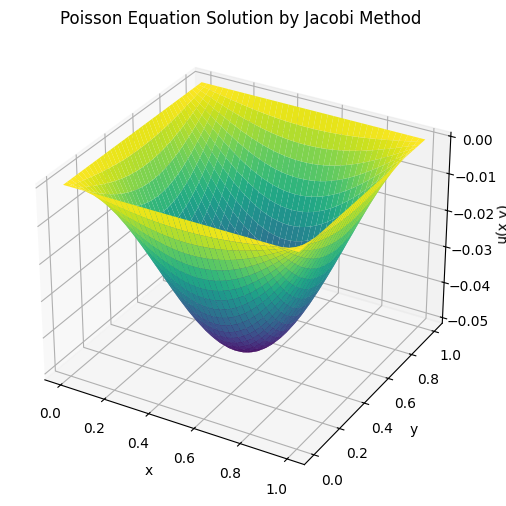

반복 횟수: 1861
21.138171672821045


In [15]:
# Jacobi method

start_time=time.time()

u_list_J=[u0,]

k=0
while k<2000:
    u_new=np.zeros((n, n))
    for i in range(1, n-1):
        for j in range(1, n-1):
            u_new[i, j]=0.25*(u_list_J[k][i+1,j]+u_list_J[k][i-1,j]+u_list_J[k][i,j+1]+u_list_J[k][i,j-1]-(h**2)*f(x_list[i],y_list[j]))
    k+=1
    if np.linalg.norm(u_new-u_list_J[-1])<1e-5:
        break
    u_list_J.append(u_new.copy())


fig = plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,u_list_J[-1], cmap='viridis') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_title('Poisson Equation Solution by Jacobi Method')
plt.show()

# 반복 횟수 도출
print(f"반복 횟수: {k-1}")
k_J=k-1

# computational time 측정
end_time=time.time()
comp_time_J=end_time-start_time
print(comp_time_J)





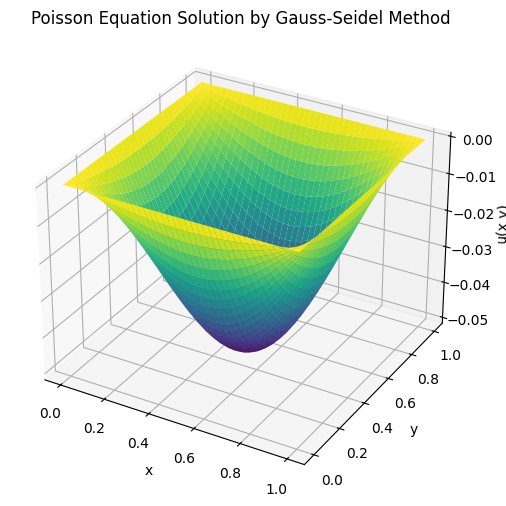

반복 횟수: 1043
11.953766584396362


In [16]:
# Gauss-Seidel method

start_time=time.time()

u_list_G=[u0,]

k=0
u=np.zeros((n, n))
while k<2000:
    for i in range(1, n-1):
        for j in range(1, n-1):
            u[i, j]=0.25*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1]-(h**2)*f(x_list[i],y_list[j]))
    k+=1
    if np.linalg.norm(u-u_list_G[-1])<1e-5:
        break
    u_list_G.append(u.copy())

fig = plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,u_list_G[-1], cmap='viridis') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_title('Poisson Equation Solution by Gauss-Seidel Method')
plt.show()

# 반복 횟수 도출
print(f"반복 횟수: {k-1}")
k_G=k-1

# computational time 측정
end_time=time.time()
comp_time_G=end_time-start_time
print(comp_time_G)

In [9]:
# Gauss-Seidel method with successive over-relaxation (SOR)
# 최적의 완화계수 w 찾기

u0=np.zeros((n, n))
u_list_GSOR=[u0,]

for w in [1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9]:
    start_time=time.time()
    k=0
    u=np.zeros((n, n))
    while k<1000:
        for i in range(1, n-1):
            for j in range(1, n-1):
                u[i, j]=(1-w)*u[i, j]+0.25*w*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1]-(h**2)*f(x_list[i],y_list[j]))
        k+=1
        if np.linalg.norm(u-u_list_GSOR[-1])<1e-5:
            break
        u_list_GSOR.append(u.copy())
    # 반복 횟수 도출
    print(f"w={w}일 때 반복 횟수: {k-1}")
    k_GSOR=k-1

    # computational time 측정
    end_time=time.time()
    comp_time_GSOR=end_time-start_time
    print(f'소요 시간:{comp_time_GSOR}')
    print()


w=1.1일 때 반복 횟수: 880
소요 시간:13.029031753540039

w=1.2일 때 반복 횟수: 739
소요 시간:11.784751653671265

w=1.3일 때 반복 횟수: 614
소요 시간:8.293700933456421

w=1.4일 때 반복 횟수: 504
소요 시간:6.267594575881958

w=1.5일 때 반복 횟수: 404
소요 시간:4.721038818359375

w=1.6일 때 반복 횟수: 312
소요 시간:3.634824514389038

w=1.7일 때 반복 횟수: 226
소요 시간:2.846325159072876

w=1.8일 때 반복 횟수: 141
소요 시간:1.7256946563720703

w=1.9일 때 반복 횟수: 93
소요 시간:1.2337543964385986



In [13]:
# Gauss-Seidel method with successive over-relaxation (SOR)
# 최적의 완화계수 w 찾기

u0=np.zeros((n, n))
u_list_GSOR=[u0,]

for w in [1.85, 1.86, 1.87, 1.88, 1.89, 1.9, 1.91, 1.92, 1.93, 1.94, 1.95]:
    start_time=time.time()
    k=0
    u=np.zeros((n, n))
    while k<500:
        for i in range(1, n-1):
            for j in range(1, n-1):
                u[i, j]=(1-w)*u[i, j]+0.25*w*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1]-(h**2)*f(x_list[i],y_list[j]))
        k+=1
        if np.linalg.norm(u-u_list_GSOR[-1])<1e-5:
            break
        u_list_GSOR.append(u.copy())
    # 반복 횟수 도출
    print(f"w={w}일 때 반복 횟수: {k-1}")
    k_GSOR=k-1

    # computational time 측정
    end_time=time.time()
    comp_time_GSOR=end_time-start_time
    print(f'소요 시간:{comp_time_GSOR}')
    print()

w=1.85일 때 반복 횟수: 90
소요 시간:1.2321979999542236

w=1.86일 때 반복 횟수: 77
소요 시간:1.0579793453216553

w=1.87일 때 반복 횟수: 80
소요 시간:0.933905839920044

w=1.88일 때 반복 횟수: 81
소요 시간:1.3920783996582031

w=1.89일 때 반복 횟수: 89
소요 시간:1.5827629566192627

w=1.9일 때 반복 횟수: 93
소요 시간:1.1985352039337158

w=1.91일 때 반복 횟수: 106
소요 시간:1.3341445922851562

w=1.92일 때 반복 횟수: 120
소요 시간:1.8770923614501953

w=1.93일 때 반복 횟수: 133
소요 시간:2.47575044631958

w=1.94일 때 반복 횟수: 154
소요 시간:2.7407567501068115

w=1.95일 때 반복 횟수: 190
소요 시간:3.5369129180908203



ω=1.86을 적용한 Gauss-Seidel+SOR

[ 0.         -0.00396455 -0.00790478 -0.0117964  -0.01561523 -0.01933775
 -0.02294102 -0.02640284 -0.02970189 -0.03281781 -0.03573139 -0.03842466
 -0.04088102 -0.04308533 -0.04502399 -0.04668505 -0.04805828 -0.04913521
 -0.0499092  -0.05037549 -0.0505312  -0.05037538 -0.04990898 -0.04913489
 -0.04805788 -0.04668458 -0.04502346 -0.04308476 -0.04088043 -0.03842406
 -0.03573079 -0.03281723 -0.02970135 -0.02640235 -0.02294056 -0.01933735
 -0.01561491 -0.01179621 -0.00790477 -0.00396461  0.        ]


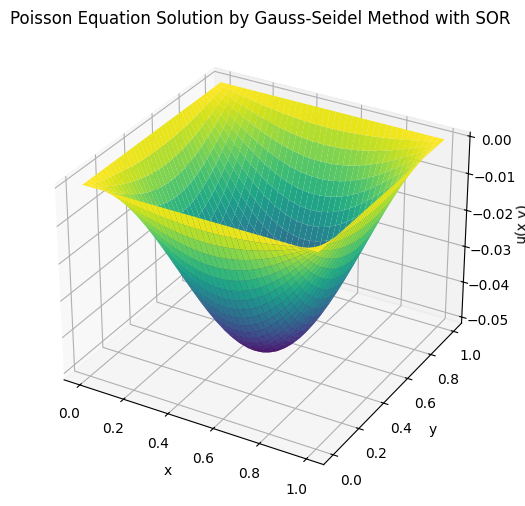

반복 횟수: 77
1.9927136898040771


In [40]:
# Gauss-Seidel method with successive over-relaxation (SOR)

start_time=time.time()

u_list_GSOR=[u0,]

k=0
w=1.86
u=np.zeros((n, n))
while k<2000:
    for i in range(1, n-1):
        for j in range(1, n-1):
            u[i, j]=(1-w)*u[i, j]+0.25*w*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1]-(h**2)*f(x_list[i],y_list[j]))
    k+=1
    if np.linalg.norm(u-u_list_GSOR[-1])<1e-5:
        break
    u_list_GSOR.append(u.copy())

# 2-2 문제에 쓸 단면 그래프를 위한 작업
u_middle_f1=u_list_GSOR[-1][int((n-1)/2)+1]
print(u_middle_f1)

fig = plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,u_list_GSOR[-1], cmap='viridis') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_title('Poisson Equation Solution by Gauss-Seidel Method with SOR')
plt.show()

# 반복 횟수 도출
print(f"반복 횟수: {k-1}")
k_GSOR=k-1

# computational time 측정
end_time=time.time()
comp_time_GSOR=end_time-start_time
print(comp_time_GSOR)

(2) 각 반복계산 방법의 Performance를 보이시오. Ex. norm of residual, errors, computational time, etc

In [17]:
def u_exact(x, y):
    return -np.sin(np.pi*x)*np.sin(np.pi*y)/(2*np.pi**2)

In [18]:
# Jacobi method

## number of repetitions
print(f'Reps: {k_J}')

## Norm of residual
norm_J=np.zeros((n, n))
for i in range(1, n-1):
    for j in range(1, n-1):
        norm_J[i,j]=f(x_list[i],y_list[j])-(u_list_J[-1][i+1,j] + u_list_J[-1][i-1,j] + u_list_J[-1][i,j+1] + u_list_J[-1][i,j-1] - 4*u_list_J[-1][i,j])/(h**2)
print(f'Norm of residual: {np.linalg.norm(norm_J):.7f}')

## errors
print(f'error: {np.linalg.norm(u_list_J[-1]-u_exact(X, Y)):.7f}')

## computational time
print(f'computational time: {comp_time_J:.3f}s')

Reps: 1861
Norm of residual: 0.0639298
error: 0.0027194
computational time: 21.138s


In [19]:
# Gauss-Seidel method

## number of repetitions
print(f'Reps: {k_G}')

## Norm of residual
norm_G=np.zeros((n, n))
for i in range(1, n-1):
    for j in range(1, n-1):
        norm_G[i,j]=f(x_list[i],y_list[j])-(u_list_G[-1][i+1,j] + u_list_G[-1][i-1,j] + u_list_G[-1][i,j+1] + u_list_G[-1][i,j-1] - 4*u_list_G[-1][i,j])/(h**2)
print(f'Norm of residual: {np.linalg.norm(norm_G):.7f}')

## errors
print(f'error: {np.linalg.norm(u_list_G[-1]-u_exact(X, Y),2):.7f}')

## computational time
print(f'computational time: {comp_time_G:.3f}s')

Reps: 1043
Norm of residual: 0.0321095
error: 0.0011020
computational time: 11.954s


In [41]:
# Gauss-Seidel method with successive over-relaxation (SOR)

## number of repetitions
print(f'Reps: {k_GSOR}')

## Norm of residual
norm_GSOR=np.zeros((n, n))
for i in range(1, n-1):
    for j in range(1, n-1):
        norm_GSOR[i,j]=f(x_list[i],y_list[j])-(u_list_GSOR[-1][i+1,j] + u_list_GSOR[-1][i-1,j] + u_list_GSOR[-1][i,j+1] + u_list_GSOR[-1][i,j-1] - 4*u_list_GSOR[-1][i,j])/(h**2)
print(f'Norm of residual: {np.linalg.norm(norm_GSOR):.7f}')

## errors
print(f'error: {np.linalg.norm(u_list_GSOR[-1]-u_exact(X, Y),2):.7f}')

## computational time
print(f'computational time: {comp_time_GSOR:.3f}s')

Reps: 77
Norm of residual: 0.0179107
error: 0.0005396
computational time: 1.993s


2. (Lineaerity) 다음의 포아송 방정식을 고려하여 문제를 푸시오.
∇ଶuሺx, yሻ ൌ fଵሺx, yሻ ൅ fଶሺx, yሻ for ሺx, yሻ ∈ Ω

그리고 경계 ∂Ω에서 uሺx, yሻ ൌ 0 를 만족하며, 정사각 계산영역 ሾ0,1ሿ ൈ ሾ0,1ሿ에서 진행하시오.

(1) Poisson equation의 해 u(x,y)를 SOR 방법을 사용하여 구하시오. 우항의 forcing 함수는 다음과 같이 주어진다.

fଵሺx, yሻ ൌ sinሺπxሻ sinሺπyሻ
fଶሺx, yሻ ൌ exp൫െ100.0ሺሺx െ 0.5ሻଶ ൅ ሺy െ 0.5ሻଶሻ൯

In [32]:
def f1(x,y):
    return np.sin(np.pi*x)*np.sin(np.pi*y)

def f2(x,y):
    return np.exp(-100.0*((x-0.5)**2+(y-0.5)**2))

def f12(x,y):
    return f1(x,y)+f2(x,y)

[ 0.         -0.00429146 -0.0085614  -0.01278841 -0.01695133 -0.02102988
 -0.02500472 -0.02885777 -0.03257242 -0.03613395 -0.03952987 -0.04275014
 -0.04578681 -0.0486324  -0.05127584 -0.05369553 -0.05585072 -0.05767546
 -0.05908163 -0.05997512 -0.06028226 -0.059975   -0.05908138 -0.0576751
 -0.05585027 -0.053695   -0.05127525 -0.04863177 -0.04578615 -0.04274947
 -0.03952921 -0.03613331 -0.03257182 -0.02885722 -0.02500423 -0.02102943
 -0.01695097 -0.01278819 -0.00856138 -0.00429151  0.        ]
반복 횟수: 77


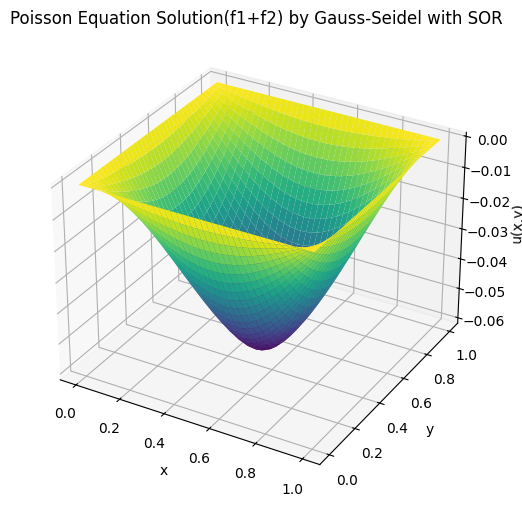

In [35]:
# f1+f2 Gauss-Seidel method with successive over-relaxation (SOR)

u_list_GSOR_f12=[u0,]

k=0
w=1.86
u=np.zeros((n, n))
while k<2000:
    for i in range(1, n-1):
        for j in range(1, n-1):
            u[i, j]=(1-w)*u[i, j]+0.25*w*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1]-(h**2)*f12(x_list[i],y_list[j]))
    k+=1
    if np.linalg.norm(u-u_list_GSOR_f12[-1])<1e-5:
        break
    u_list_GSOR_f12.append(u.copy())

# 2-2 문제에 쓸 단면 그래프를 위한 작업
u_middle_f12=u_list_GSOR_f12[-1][int((n-1)/2)+1]
print(u_middle_f12)

# 반복 횟수 도출
print(f"반복 횟수: {k-1}")
k_GSOR_f12=k-1

fig = plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,u_list_GSOR_f12[-1], cmap='viridis') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u(x,y)')
ax.set_title('Poisson Equation Solution(f1+f2) by Gauss-Seidel with SOR')
plt.show()

(2) 동일한 방법으로 f2만을 고려한 포아송 방정식의 해 u2를 구하시오

[ 0.         -0.00032638 -0.00065578 -0.00099082 -0.0013347  -0.00169059
 -0.00206209 -0.00245328 -0.00286889 -0.00331452 -0.0037969  -0.00432395
 -0.00490432 -0.00554566 -0.0062505  -0.00700919 -0.00779122 -0.00853911
 -0.00917138 -0.00959868 -0.00975022 -0.00959891 -0.00917182 -0.00853975
 -0.00779204 -0.00701016 -0.00625159 -0.00554685 -0.00490561 -0.00432533
 -0.00379836 -0.00331604 -0.00287045 -0.00245486 -0.00206365 -0.00169207
 -0.00133605 -0.00099198 -0.0006566  -0.0003269   0.        ]
반복 횟수: 60


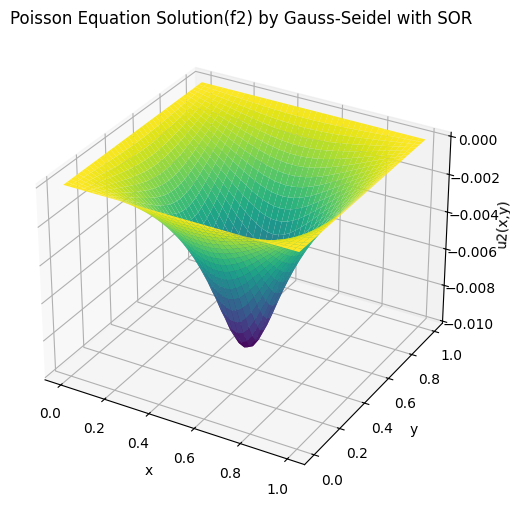

In [34]:
# f2 Gauss-Seidel method with successive over-relaxation (SOR)

u_list_GSOR_f2=[u0,]

k=0
w=1.86
u=np.zeros((n, n))
while k<2000:
    for i in range(1, n-1):
        for j in range(1, n-1):
            u[i, j]=(1-w)*u[i, j]+0.25*w*(u[i+1,j]+u[i-1,j]+u[i,j+1]+u[i,j-1]-(h**2)*f2(x_list[i],y_list[j]))
    k+=1
    if np.linalg.norm(u-u_list_GSOR_f2[-1])<1e-5:
        break
    u_list_GSOR_f2.append(u.copy())

# 2-2 문제에 쓸 단면 그래프를 위한 작업
u_middle_f2=u_list_GSOR_f2[-1][int((n-1)/2)+1]
print(u_middle_f2)

# 반복 횟수 도출
print(f"반복 횟수: {k-1}")
k_GSOR_f2=k-1

fig = plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111, projection='3d')
ax.plot_surface(X,Y,u_list_GSOR_f2[-1], cmap='viridis') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('u2(x,y)')
ax.set_title('Poisson Equation Solution(f2) by Gauss-Seidel with SOR')
plt.show()

(3) 문제에서 구한 해 u(x,y)와 1. 문제에서 구한 u1(x, y) 그리고 2.‐(2)에서 구한 u2(x,y)의 해를 비교하고 이에 대한 생각을 서술하시오.

In [36]:
# f1
print("f1")
## number of repetitions
print(f'Reps: {k_GSOR}')

## Norm of residual
norm_GSOR=np.zeros((n, n))
for i in range(1, n-1):
    for j in range(1, n-1):
        norm_GSOR[i,j]=f(x_list[i],y_list[j])-(u_list_GSOR[-1][i+1,j] + u_list_GSOR[-1][i-1,j] + u_list_GSOR[-1][i,j+1] + u_list_GSOR[-1][i,j-1] - 4*u_list_GSOR[-1][i,j])/(h**2)
print(f'Norm of residual: {np.linalg.norm(norm_GSOR):.7f}')

## errors
print(f'error: {np.linalg.norm(u_list_GSOR[-1]-u_exact(X, Y),2):.7f}')


# f2
print("""
f2""")
## number of repetitions
print(f'Reps: {k_GSOR_f2}')

## Norm of residual
norm_GSOR_f2=np.zeros((n, n))
for i in range(1, n-1):
    for j in range(1, n-1):
        norm_GSOR_f2[i,j]=f2(x_list[i],y_list[j])-(u_list_GSOR_f2[-1][i+1,j] + u_list_GSOR_f2[-1][i-1,j] + u_list_GSOR_f2[-1][i,j+1] + u_list_GSOR_f2[-1][i,j-1] - 4*u_list_GSOR_f2[-1][i,j])/(h**2)
print(f'Norm of residual: {np.linalg.norm(norm_GSOR_f2):.7f}')


# f12
print("""
f12""")
## number of repetitions
print(f'Reps: {k_GSOR_f12}')

## Norm of residual
norm_GSOR_f12=np.zeros((n, n))
for i in range(1, n-1):
    for j in range(1, n-1):
        norm_GSOR_f12[i,j]=f12(x_list[i],y_list[j])-(u_list_GSOR_f12[-1][i+1,j] + u_list_GSOR_f12[-1][i-1,j] + u_list_GSOR_f12[-1][i,j+1] + u_list_GSOR_f12[-1][i,j-1] - 4*u_list_GSOR_f12[-1][i,j])/(h**2)
print(f'Norm of residual: {np.linalg.norm(norm_GSOR_f12):.7f}')

f1
Reps: 77
Norm of residual: 0.0179107
error: 0.0005396

f2
Reps: 60
Norm of residual: 0.0093782

f12
Reps: 77
Norm of residual: 0.0192503


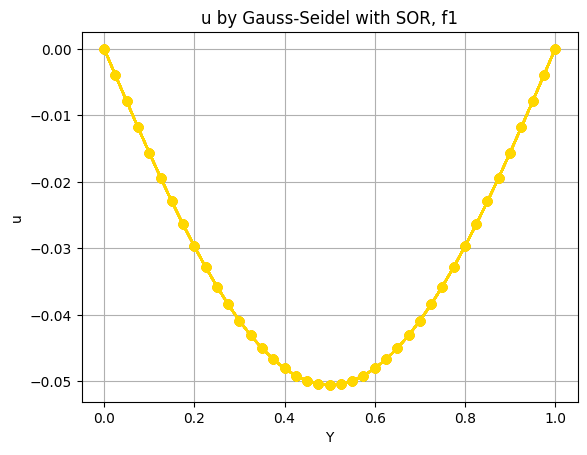

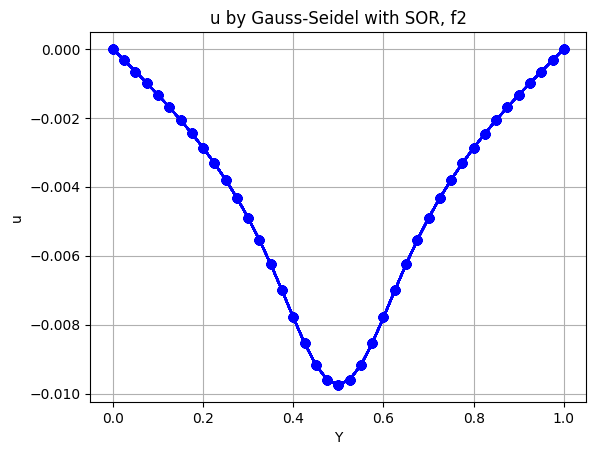

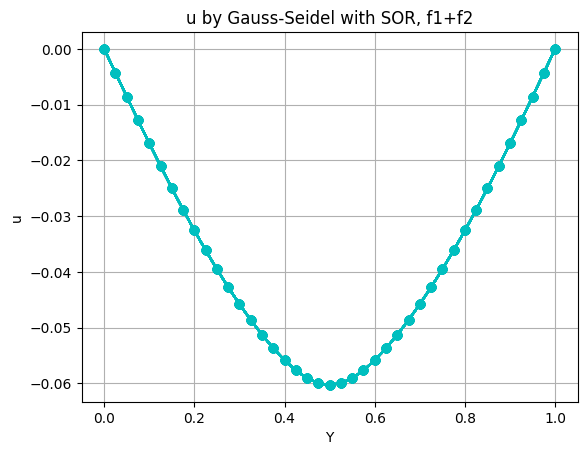

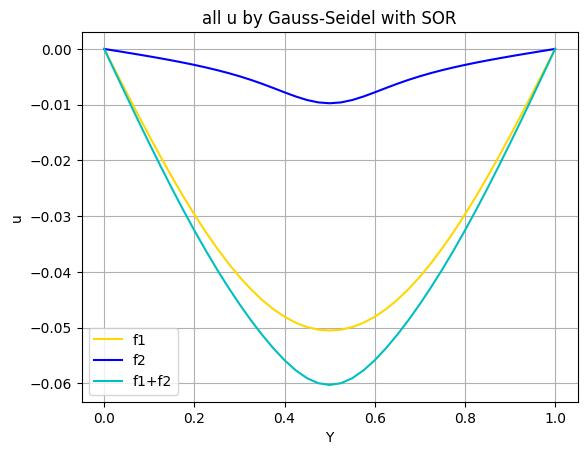

In [37]:
# f1
plt.plot(Y, u_middle_f1, marker='o', color='gold')
plt.xlabel('Y')
plt.ylabel('u')
plt.title('u by Gauss-Seidel with SOR, f1')
plt.grid()
plt.show()

# f2
plt.plot(Y, u_middle_f2, marker='o', color='b')
plt.xlabel('Y')
plt.ylabel('u')
plt.title('u by Gauss-Seidel with SOR, f2')
plt.grid()
plt.show()

# f1+f2
plt.plot(Y, u_middle_f12, marker='o', color='c')
plt.xlabel('Y')
plt.ylabel('u')
plt.title('u by Gauss-Seidel with SOR, f1+f2')
plt.grid()
plt.show()

# 전부 다
plt.plot(y_list, u_middle_f1, color='gold', label='f1')
plt.plot(y_list, u_middle_f2, color='b', label='f2')
plt.plot(y_list, u_middle_f12, color='c', label='f1+f2')
plt.xlabel('Y')
plt.ylabel('u')
plt.title('all u by Gauss-Seidel with SOR')
plt.grid()
plt.legend()
plt.show()